In [1]:
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
# data sources : 
# https://www.kaggle.com/datasets/tanay27/handwrittennist
# https://www.kaggle.com/datasets/dhruvildave/english-handwritten-characters-dataset

In [4]:
# I later changed the name of the folder for the path, but I will leave it like this because this is how I prepared the orginal dataframe. 
# labeled folders and images come from https://www.kaggle.com/datasets/dhruvildave/english-handwritten-characters-dataset
folder_path_dictionary = {}
for folder in os.listdir(path='handwriting_kaggle/dataset'):
    folder_path_dictionary[f'{folder}'] = os.listdir(path=f'handwriting_kaggle/dataset/{folder}')

In [21]:
path_label_df_dictionary = {}
for key in folder_path_dictionary.keys():
    pathdf = pd.DataFrame()
    pathdf['label'] = [f'{key[-1]}' for i in range(len(folder_path_dictionary[key]))]
    pathdf['path'] = [f'handwriting_kaggle/dataset/{key}/{file}' for file in folder_path_dictionary[key]]
    path_label_df_dictionary[key] = pathdf

In [26]:
path_df = pd.DataFrame(columns=['label', 'path'])
for key, dataframe in path_label_df_dictionary.items():
    path_df = pd.concat([path_df, dataframe])

In [28]:
path_df.shape

(425122, 2)

In [29]:
path_df.label.value_counts(10)*100

o    3.987091
U    3.019604
c    3.009019
i    3.008078
S    2.986907
m    2.971853
f    2.938686
p    2.746976
R    2.662295
r    2.352266
N    2.352266
l    2.352266
t    2.352266
1    2.352266
T    2.352266
0    2.352266
8    2.352266
d    2.352266
2    2.352266
3    2.352266
4    2.352266
5    2.352266
6    2.352266
7    2.352266
e    2.352266
9    2.352266
a    2.352266
h    2.284756
n    2.152088
g    1.908864
V    1.835944
W    1.817125
Y    1.751732
A    1.648938
H    1.633413
q    1.555789
J    1.383603
Q    1.313505
X    1.305743
b    1.305743
G    1.302920
z    1.275869
E    1.274928
L    1.267871
K    1.184366
D    1.163196
B    0.962312
Name: label, dtype: float64

In [30]:
path_df.to_csv('path_label_425000_letters.csv', index=False)

# I later changed the name of this csv to English_large.csv

In [31]:
path_df.label.unique()

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'A', 'b',
       'B', 'c', 'd', 'D', 'e', 'E', 'f', 'g', 'G', 'h', 'H', 'i', 'J',
       'K', 'L', 'l', 'm', 'n', 'N', 'o', 'p', 'q', 'Q', 'r', 'R', 'S',
       't', 'T', 'U', 'V', 'W', 'X', 'Y', 'z'], dtype=object)

In [32]:
# put letters and numbers which look the same into the same group. 
path_df['label'] = ['o' if val == '0' else val for val in path_df['label']]
path_df['label'] = ['l' if val == '1' else val for val in path_df['label']]
# path_df['label'] = ['l' if val == 'i' else val for val in path_df['label']]

h
(128, 128, 3)


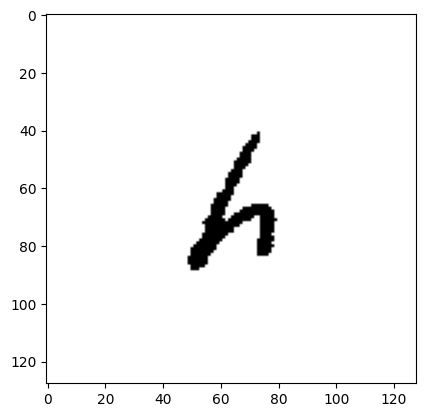

In [37]:
img = cv2.imread(path_df.path.iloc[200000])
print(path_df.label.iloc[200000])
print(img.shape)
plt.imshow(img);

In [38]:
# path dataframe and images downloaded from https://www.kaggle.com/datasets/dhruvildave/english-handwritten-characters-dataset
chars = pd.read_csv('english.csv')
chars.sample()

,image,label
1188,Img/img022-034.png,L


In [39]:
chars.columns = ['path', 'label']

(900, 1200, 3)
A


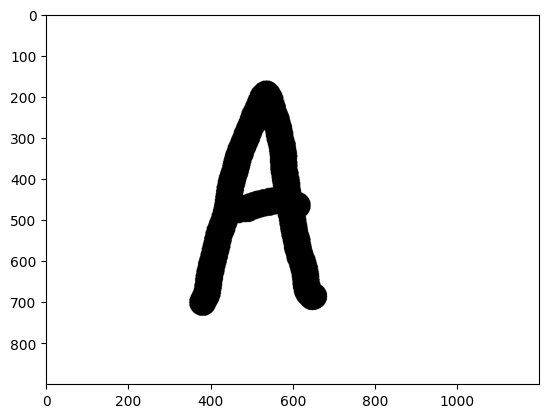

In [40]:
img = cv2.imread(chars['path'].iloc[600]) 
print(img.shape)
print(chars.label.iloc[600])
plt.imshow(img);

In [41]:
# check if all three arrays are equal
blue, green, red = cv2.split(img) 
for row in range(len(green)):
    for i in range(row):
        if green[row][i] == red[row][i]:
            pass
        if green[row][i] == blue[row][i]:
            pass
        if red[row][i] == blue[row][i]:
            pass
        else:
            print(i)

In [42]:
green[899].mean(), green[450].mean(), green[0].mean(), green[-1].mean()

(255.0, 206.125, 255.0, 255.0)

In [31]:
# remove extra whitespace
new_green1 = []
for arr in green:
    if arr.mean() == 255:
        pass
    else:
        new_green1.append(arr)
new_green1 = np.array(new_green1)
new_green = []
for arr in new_green1.T:
    if arr.mean() == 255:
        pass
    else:
        new_green.append(arr)
new_green = np.array(new_green).T

In [32]:
img.shape, green.shape, new_green.shape

((900, 1200, 3), (900, 1200), (574, 337))

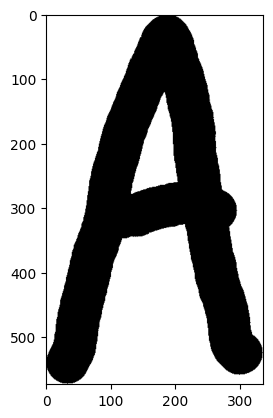

In [33]:
img_zoom = (np.dstack((new_green, new_green, new_green)))
plt.imshow(img_zoom);

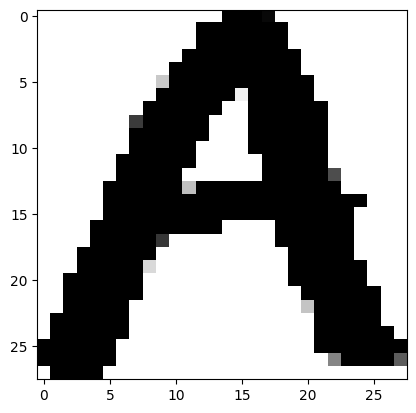

In [34]:
test_resize = cv2.resize(img_zoom, (28, 28))
plt.imshow(test_resize)

In [50]:
# Everything works - create a function to remove whitespace and resize

def remove_white_resize(img, new_size):
    blue, green, red = cv2.split(img)
    new_green1 = []
    for arr in green:
        if arr.mean() == 255:
            pass
        else:
            new_green1.append(arr)
    new_green1 = np.array(new_green1)
    new_green = []
    for arr in new_green1.T:
        if arr.mean() == 255:
            pass
        else:
            new_green.append(arr)
    new_green = np.array(new_green).T
    #img_zoom = (np.dstack((new_green, new_green, new_green)))
    resized = cv2.resize(new_green, (new_size, new_size))
    return resized

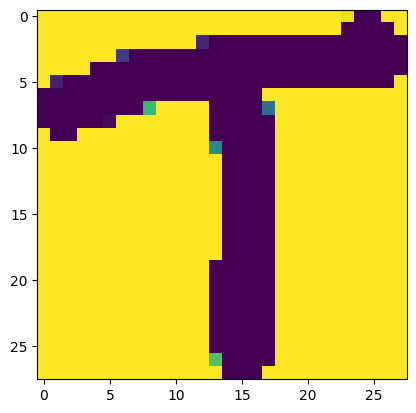

In [51]:
test_function_chars = remove_white_resize(cv2.imread(chars['path'].iloc[1600]), 28)
plt.imshow(test_function_chars);

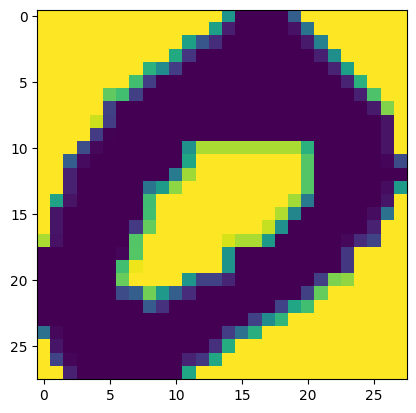

In [53]:
test_function_pathdf = remove_white_resize(cv2.imread(path_df['path'].iloc[2900]), 28)
plt.imshow(test_function_pathdf);

In [54]:
test_function_chars.shape, test_function_pathdf.shape

((28, 28), (28, 28))

In [55]:
chars.label.unique()

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C',
       'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P',
       'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c',
       'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p',
       'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'], dtype=object)

In [41]:
chars.label.nunique()

62

In [42]:
chars.label.value_counts(10)[:3]

0    0.016129
k    0.016129
X    0.016129
Name: label, dtype: float64

V


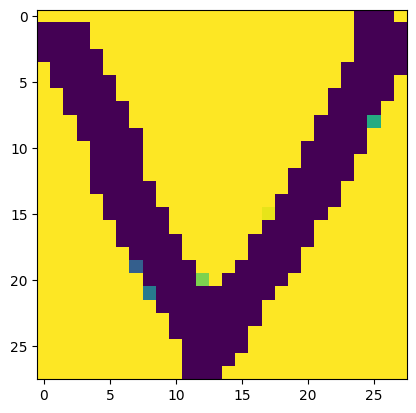

In [56]:
cv2_images = [remove_white_resize(cv2.imread(file), 28) for file in chars.path]
print(chars.label.iloc[1755])
plt.imshow(cv2_images[1755]);

In [57]:
cv2_images[2000].shape

(28, 28)

In [58]:
cv2_images_largedf = [remove_white_resize(cv2.imread(file), 28) for file in path_df.path]
print(path_df.label.iloc[10755])
# plt.imshow(cv2_images[10755]);

l


IndexError: list index out of range

2


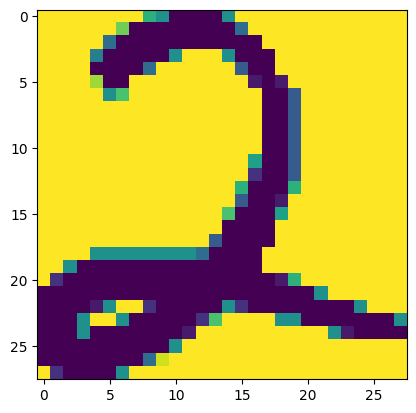

In [60]:
print(path_df.label.iloc[20755])
plt.imshow(cv2_images_largedf[20755]);

In [73]:
df = chars[['label']]
df['images'] = cv2_images
df.head()

,label,images
0,0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
1,0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
2,0,"[[255, 255, 255, 255, 255, 255, 255, 255, 0, 0..."
3,0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
4,0,"[[255, 255, 255, 255, 255, 255, 255, 255, 0, 0..."


In [62]:
dflarge = path_df[['label']]
dflarge['images'] = cv2_images_largedf
dflarge.head()

,label,images
0,o,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
1,o,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
2,o,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
3,o,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
4,o,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."


In [63]:
dflarge.to_csv('data/large_df_not_flat.csv', index=False)

In [66]:
dflarge.sample()

,label,images
208,g,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."


In [116]:
def flatten_image(original_df, col_name, img_size):
    df = original_df.copy()
    df['images_flat'] = [ar.reshape(img_size*img_size) for ar in df[col_name]]
    array_dictionary = {}
    for n in range(img_size*img_size):
        new_list = []
        for i in df.images_flat:
            new_list.append(i[n])
        try:
            array_dictionary[f'count_{n}'].append(new_list)
        except: 
            array_dictionary[f'count_{n}'] = [new_list]
    for key, value in array_dictionary.items():
        list1 = [str(val) for val in value[0]]
        df[key] = list1
        df[key] = [int(val) for val in df[key]]
    df.drop(columns=[col_name, 'images_flat'], inplace=True)
    return df

In [123]:
# dflarge_flat = flatten_image(dflarge, 'images', 28)

dflarge_flat.to_csv('data/flat_dflarge.csv', index=False)

# dflarge_flat = pd.read_csv('data/flat_dflarge.csv')

In [122]:
dflarge_flat.shape

(425122, 785)

In [125]:
pd.read_csv('data/flat_dflarge.csv').shape

C:\Users\Emily\anaconda3\envs\myenvsept\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(425122, 785)

In [127]:
# df_flat = flatten_image(df, 'images', 28)

df_flat = pd.read_csv('data/flat_digits_letters_dataset1.csv')

In [129]:
all_data = pd.concat([df_flat, dflarge_flat])

In [3]:
# all_data.to_csv('data/all_data.csv', index=False)

all_data = pd.read_csv('data/all_data.csv')

C:\Users\Emily\anaconda3\envs\myenvsept\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
print(all_data.shape)
all_data.sample()

(428532, 785)


,label,count_0,count_1,count_2,count_3,count_4,count_5,count_6,count_7,count_8,...,count_774,count_775,count_776,count_777,count_778,count_779,count_780,count_781,count_782,count_783
423636,z,255,255,255,255,255,255,255,255,255,...,91,91,91,91,91,91,91,91,91,91


In [4]:
print(list(all_data.label.unique()))

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 2, 3, 4, 5, 6, 7, 8, 9]


In [5]:
all_data.label = [str(val) for val in all_data.label]

In [50]:
# I realized that many letter and numbers are written exactly the same
# It would be nearly impossible to train a machine to recognize the difference between zero and O or one and l
# I also realized that many uppercase and lowercase letters look the same written (c and C, k and K, o and O, 
# p and P, s ans S, v and V, x and X, and z and Z)
# For this reason, I will split the numbers from my dataset and label all letters with the lowercase letters. 
# The machine will not be able to detect the difference between lowercase and uppercase letters, but I think it is worth it 
# in order to be more accurate.  
# I will include more handwritten letter and digit datasets and images from kaggle in the next model.
# I will also test on letters and numbers that my friends write.

# UPDATE: Instead of separating the digit and letter data and testing only for lowercase, I will merge only 
# the lowercase and uppercase whcih are similar and put them in a class of the lowercase form. 
# zero will be merged with o.
# one will be merged with I. 

In [6]:
lower_upper_same = ['C', 'J', 'K', 'L', 'M', 'O', 'P', 'S', 'U', 'V', 'W', 'X', 'Y', 'Z']
all_data['label'] = [val.lower() if val in lower_upper_same else val for val in all_data.label]

In [7]:
print(sorted(all_data.label.unique()))

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'D', 'E', 'F', 'G', 'H', 'I', 'N', 'Q', 'R', 'T', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [8]:
all_data['label'] = ['o' if val == '0' else val for val in all_data.label]
all_data['label'] = ['I' if val == '1' else val for val in all_data.label]
all_data['label'] = ['I' if val == 'l' else val for val in all_data.label]

In [9]:
X = all_data.drop(columns=['label'])
y_original = all_data['label']

In [12]:
y_original.value_counts(10)*100

o    6.327415
I    5.976216
u    3.021245
c    3.010744
i    2.996976
s    2.988808
m    2.973874
f    2.928136
p    2.750786
R    2.653944
9    2.346383
N    2.346383
r    2.346383
2    2.346383
3    2.346383
e    2.346383
d    2.346383
a    2.346383
T    2.346383
5    2.346383
6    2.346383
4    2.346383
7    2.346383
8    2.346383
t    2.346383
h    2.279410
n    2.147798
g    1.906509
v    1.847003
w    1.828335
y    1.763462
A    1.648652
H    1.633250
q    1.556243
j    1.398262
x    1.321022
Q    1.315888
b    1.308187
G    1.305387
z    1.291385
E    1.277618
k    1.200610
D    1.166774
B    0.967489
F    0.012835
Name: label, dtype: float64

In [13]:
pd.factorize(y_original)

(array([ 0,  0,  0, ..., 32, 32, 32], dtype=int64),
 Index(['o', 'I', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'c', 'D',
        'E', 'F', 'G', 'H', 'j', 'k', 'm', 'N', 'p', 'Q', 'R', 's', 'T', 'u',
        'v', 'w', 'x', 'y', 'z', 'a', 'b', 'd', 'e', 'f', 'g', 'h', 'i', 'n',
        'q', 'r', 't'],
       dtype='object'))

In [11]:
all_data['label_factorized'], label_index = pd.factorize(y_original)

In [13]:
y = pd.factorize(y_original)[0]

In [17]:
type(X), type(y)

(pandas.core.frame.DataFrame, numpy.ndarray)

In [14]:
img_size = 28

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=22)

x_train = np.reshape(x_train.values, (x_train.shape[0], img_size, img_size))
x_test = np.reshape(x_test.values, (x_test.shape[0], img_size, img_size))
print("Shape of training data: ", x_train.shape)
print("Shape of testing data: ", x_test.shape)

Shape of training data:  (321399, 28, 28)
Shape of testing data:  (107133, 28, 28)


In [25]:
alphabet = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

In [22]:
print(label_index)

Index(['o', 'I', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'c', 'D',
       'E', 'F', 'G', 'H', 'j', 'k', 'm', 'N', 'p', 'Q', 'R', 's', 'T', 'u',
       'v', 'w', 'x', 'y', 'z', 'a', 'b', 'd', 'e', 'f', 'g', 'h', 'i', 'n',
       'q', 'r', 't'],
      dtype='object')


8


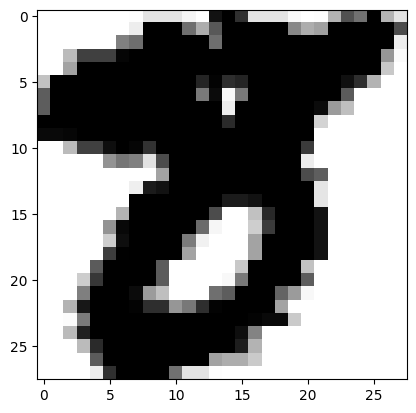

In [15]:
print(label_index[y_train[2228]])
plt.gray()
plt.imshow(np.reshape(x_train[2228], (img_size, img_size)));

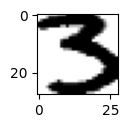

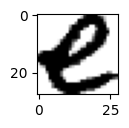

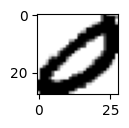

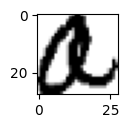

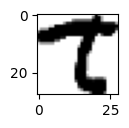

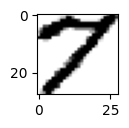

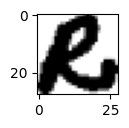

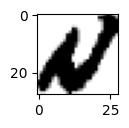

In [38]:
for i in range(90,98):
    plt.subplot(330 + 1 + i)
    plt.gray()
    plt.imshow(x_train[i])
    plt.show()

In [24]:
# reshape data for model:

x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2],1)
print("New shape of training data: ", x_train.shape)
print("New shape of testing data: ", x_test.shape)

New shape of training data:  (321399, 28, 28, 1)
New shape of testing data:  (107133, 28, 28, 1)


In [26]:
len(set(y_train))

45

In [16]:
import tensorflow
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# change format of labels for the model
y_training = to_categorical(y_train, num_classes = 45, dtype='int')
y_testing = to_categorical(y_test, num_classes = 45, dtype='int')

In [17]:
# divide numbers by 255 to normalize the features
x_train_norm = x_train/255
x_test_norm = x_test/255

In [18]:
# make validation dataset

x_train_norm_model, x_validate, y_training_model, y_validate = train_test_split(x_train_norm, 
                    y_training, test_size = 0.15, stratify=y_training, random_state=22)

In [20]:
def make_model(input_img_size = 28, output_amount_labels=45):
    model = Sequential()
    model.add(Conv2D(64 , (3, 3), activation='relu', input_shape=(input_img_size, input_img_size, 1)))
    model.add(MaxPool2D(2, 2))
 
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPool2D(2, 2))
 
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPool2D(2,2))
    
    model.add(Flatten())
 
    model.add(Dense(128,activation ="relu"))
    model.add(Dense(256,activation ="relu"))
    model.add(Dense(output_amount_labels,activation ="softmax"))
    
    print(model.summary())
    
    return model

model = make_model()
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_norm_model, y_training_model, epochs=5,  validation_data = (x_validate,y_validate))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 1, 1, 64)        

In [31]:
x_test_norm = x_test/255

In [32]:
model.evaluate(x_test_norm, y_testing)

3348/3348 [==============================] - 54s 16ms/step - loss: 0.4557 - accuracy: 0.8502


[0.45567625761032104, 0.8501955270767212]

true label: T
1507/1507 [==============================] - 20s 13ms/step
predicted label: T


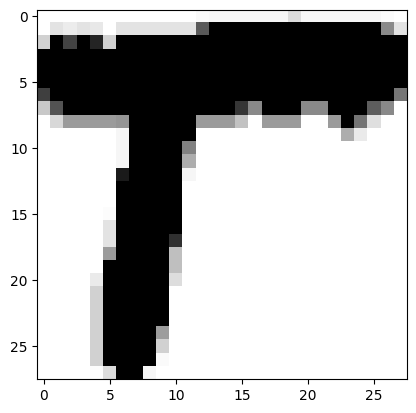

In [25]:
print('true label:', label_index[y_validate[0].argmax()])
y_predicted = model.predict(x_validate)
pred1 = y_predicted[0].argmax()
print('predicted label:', label_index[int(pred1)])
#print('predicted label:', alphabet[np.argmax(y_predicted)[0]])
plt.gray()
plt.imshow(x_validate[0]);

true label: E
predicted label: E


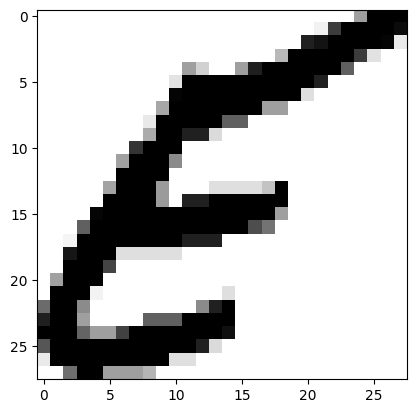

In [28]:
print('true label:', label_index[y_validate[4].argmax()])
pred1 = y_validate[4].argmax()
print('predicted label:', label_index[int(pred1)])
#print('predicted label:', alphabet[np.argmax(y_predicted)[0]])
plt.gray()
plt.imshow(x_validate[4]);

In [34]:
def make_model(input_img_size = 28, output_amount_labels=45):
    model = Sequential()
    model.add(Conv2D(64 , (3, 3), activation='relu', input_shape=(img_size,img_size,1)))
    model.add(MaxPool2D(2, 2))
 
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPool2D(2, 2))
 
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPool2D(2,2))
    
    model.add(Flatten())
 
    model.add(Dense(128,activation ="relu"))
    model.add(Dense(256,activation ="relu"))
    model.add(Dense(output_amount_labels,activation ="softmax"))
    
    print(model.summary())
    
    return model

model2 = make_model()
model2.compile(optimizer = Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
history = model2.fit(x_train_norm_model, y_training_model, epochs=5,  validation_data = (x_validate,y_validate))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 5, 5, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 3, 3, 32)          36896     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 1, 1, 32)        

In [35]:
model2.evaluate(x_test, y_testing)

3348/3348 [==============================] - 47s 14ms/step - loss: 1.1705 - accuracy: 0.6398


[1.1705104112625122, 0.6397655010223389]

In [40]:
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPool2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(45, activation='softmax'))
    return model

model3 = define_model()
opt = SGD(learning_rate=0.01, momentum=0.9)
model3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history = model3.fit(x_train_norm_model, y_training_model, epochs=5,  validation_data = (x_validate,y_validate))

Epoch 1/5
8538/8538 [==============================] - 144s 17ms/step - loss: 0.6010 - accuracy: 0.8207 - val_loss: 0.3883 - val_accuracy: 0.8832
Epoch 2/5
8538/8538 [==============================] - 141s 16ms/step - loss: 0.3536 - accuracy: 0.8909 - val_loss: 0.3472 - val_accuracy: 0.8931
Epoch 3/5
8538/8538 [==============================] - 147s 17ms/step - loss: 0.2959 - accuracy: 0.9066 - val_loss: 0.3315 - val_accuracy: 0.8977
Epoch 4/5
8538/8538 [==============================] - 140s 16ms/step - loss: 0.2578 - accuracy: 0.9166 - val_loss: 0.3308 - val_accuracy: 0.9008
Epoch 5/5
8538/8538 [==============================] - 141s 17ms/step - loss: 0.2262 - accuracy: 0.9260 - val_loss: 0.3182 - val_accuracy: 0.9040


In [41]:
model3.evaluate(x_test, y_testing)

3348/3348 [==============================] - 27s 8ms/step - loss: 0.3145 - accuracy: 0.9050


[0.31453821063041687, 0.9049592614173889]

In [44]:
from tensorflow.keras.layers import BatchNormalization

def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dense(45, activation='softmax'))
    return model

model4 = define_model()
opt = SGD(learning_rate=0.01, momentum=0.9)
model4.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history = model4.fit(x_train_norm_model, y_training_model, epochs=5,  validation_data = (x_validate,y_validate))

Epoch 1/5
8538/8538 [==============================] - 203s 24ms/step - loss: 0.4395 - accuracy: 0.8664 - val_loss: 0.3194 - val_accuracy: 0.8994
Epoch 2/5
8538/8538 [==============================] - 200s 23ms/step - loss: 0.2898 - accuracy: 0.9069 - val_loss: 0.2894 - val_accuracy: 0.9085
Epoch 3/5
8538/8538 [==============================] - 194s 23ms/step - loss: 0.2452 - accuracy: 0.9190 - val_loss: 0.2924 - val_accuracy: 0.9073
Epoch 4/5
8538/8538 [==============================] - 194s 23ms/step - loss: 0.2147 - accuracy: 0.9275 - val_loss: 0.2833 - val_accuracy: 0.9117
Epoch 5/5
8538/8538 [==============================] - 197s 23ms/step - loss: 0.1908 - accuracy: 0.9345 - val_loss: 0.2974 - val_accuracy: 0.9065


In [45]:
model4.evaluate(x_test, y_testing)

3348/3348 [==============================] - 36s 11ms/step - loss: 0.2903 - accuracy: 0.9087


[0.2902781665325165, 0.9087022542953491]

In [ ]:
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPool2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPool2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(45, activation='softmax'))
    return model

model5 = define_model()
opt = SGD(learning_rate=0.01, momentum=0.9)
model5.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history = model5.fit(x_train_norm_model, y_training_model, epochs=5,  validation_data = (x_validate,y_validate))

In [47]:
model5.evaluate(x_test, y_testing)

3348/3348 [==============================] - 43s 13ms/step - loss: 0.2628 - accuracy: 0.9156


[0.2627716660499573, 0.9156002402305603]

In [49]:
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPool2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dense(45, activation='softmax'))
    return model


model6 = define_model()
opt = SGD(learning_rate=0.01, momentum=0.9)
model6.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history = model6.fit(x_train_norm_model, y_training_model, epochs=5,  validation_data = (x_validate,y_validate))

Epoch 1/5
8538/8538 [==============================] - 290s 34ms/step - loss: 0.4323 - accuracy: 0.8680 - val_loss: 0.3041 - val_accuracy: 0.9040
Epoch 2/5
8538/8538 [==============================] - 287s 34ms/step - loss: 0.2925 - accuracy: 0.9054 - val_loss: 0.2804 - val_accuracy: 0.9090
Epoch 3/5
8538/8538 [==============================] - 295s 35ms/step - loss: 0.2613 - accuracy: 0.9141 - val_loss: 0.2662 - val_accuracy: 0.9149
Epoch 4/5
8538/8538 [==============================] - 304s 36ms/step - loss: 0.2414 - accuracy: 0.9194 - val_loss: 0.2542 - val_accuracy: 0.9173
Epoch 5/5
8538/8538 [==============================] - 300s 35ms/step - loss: 0.2271 - accuracy: 0.9241 - val_loss: 0.2545 - val_accuracy: 0.9158


In [50]:
model6.evaluate(x_test, y_testing)

3348/3348 [==============================] - 51s 15ms/step - loss: 0.2531 - accuracy: 0.9165


[0.25309816002845764, 0.9164683222770691]

In [51]:
valid_preds = model6.predict(x_validate)
test_preds = model6.predict(x_test)

1507/1507 [==============================] - 35s 23ms/step


In [100]:
train_preds = model6.predict(x_train)

10044/10044 [==============================] - 294s 29ms/step


In [74]:
y_validate_labels = [label_index[y_validate[i].argmax()] for i in range(len(y_validate))]
y_test_labels = [label_index[y_testing[i].argmax()] for i in range(len(y_testing))]
pred_y_validate_labels = [label_index[valid_preds[i].argmax()] for i in range(len(valid_preds))]
pred_y_test_labels = [label_index[test_preds[i].argmax()] for i in range(len(test_preds))]

In [ ]:
pred_y_train_labels = [label_index[train_preds[i].argmax()] for i in range(len(train_preds))]
y_train_labels = [label_index[y_training[i].argmax()] for i in range(len(train_preds))]

In [88]:
validate_error_counter = dict(zip(list(set(y_validate_labels)),[0 for i in range(45)]))
test_error_counter = dict(zip(list(set(y_validate_labels)),[0 for i in range(45)]))

In [89]:
for i in range(len(y_validate_labels)):
    if y_validate_labels[i] != pred_y_validate_labels[i]:
        validate_error_counter[y_validate_labels[i]] = validate_error_counter[y_validate_labels[i]]+1

In [91]:
for i in range(len(y_test_labels)):
    if y_test_labels[i] != pred_y_test_labels[i]:
        test_error_counter[y_test_labels[i]] = test_error_counter[y_test_labels[i]]+1        

In [92]:
print(test_error_counter)

{'Q': 45, 'b': 156, 'G': 151, 'p': 74, '2': 152, 'n': 75, 'z': 295, 'E': 56, 'H': 59, 'h': 165, 't': 186, '5': 438, 'y': 147, 'R': 56, 'r': 122, 'e': 71, 's': 110, '3': 36, 'j': 136, 'I': 1279, 'f': 142, 'A': 56, '7': 72, 'D': 97, 'q': 576, 'a': 227, '9': 802, 'i': 1084, 'g': 479, 'w': 32, '8': 129, 'T': 152, 'N': 150, '6': 153, 'k': 58, 'v': 150, 'c': 105, 'F': 14, 'u': 129, 'd': 47, 'm': 57, 'o': 153, 'x': 65, 'B': 61, '4': 150}


In [ ]:
# lots of mistakes with i and I. These should probably merged into one label. 

In [98]:
print(sorted(test_error_counter.items(), key=lambda x:x[1], reverse=True))

[('I', 1279), ('i', 1084), ('9', 802), ('q', 576), ('g', 479), ('5', 438), ('z', 295), ('a', 227), ('t', 186), ('h', 165), ('b', 156), ('6', 153), ('o', 153), ('2', 152), ('T', 152), ('G', 151), ('N', 150), ('v', 150), ('4', 150), ('y', 147), ('f', 142), ('j', 136), ('8', 129), ('u', 129), ('r', 122), ('s', 110), ('c', 105), ('D', 97), ('n', 75), ('p', 74), ('7', 72), ('e', 71), ('x', 65), ('B', 61), ('H', 59), ('k', 58), ('m', 57), ('E', 56), ('R', 56), ('A', 56), ('d', 47), ('Q', 45), ('3', 36), ('w', 32), ('F', 14)]


In [99]:
print(sorted(validate_error_counter.items(), key=lambda x:x[1], reverse=True))

[('I', 593), ('i', 490), ('9', 365), ('q', 285), ('g', 221), ('5', 184), ('a', 112), ('z', 105), ('2', 83), ('j', 75), ('t', 74), ('y', 70), ('N', 70), ('o', 70), ('r', 67), ('v', 67), ('T', 66), ('u', 65), ('h', 62), ('b', 60), ('f', 60), ('6', 59), ('G', 58), ('D', 58), ('4', 57), ('8', 55), ('s', 50), ('c', 44), ('k', 43), ('x', 37), ('7', 36), ('n', 34), ('R', 31), ('Q', 28), ('d', 27), ('p', 26), ('e', 26), ('A', 23), ('B', 23), ('m', 21), ('E', 20), ('w', 20), ('H', 19), ('3', 13), ('F', 6)]


In [ ]:
print('true label:', label_index[y_validate[4].argmax()])
pred1 = y_validate[4].argmax()
print('predicted label:', label_index[int(pred1)])
#print('predicted label:', alphabet[np.argmax(y_predicted)[0]])
plt.gray()
plt.imshow(x_validate[4]);

image shape:  (1800, 2670, 3)


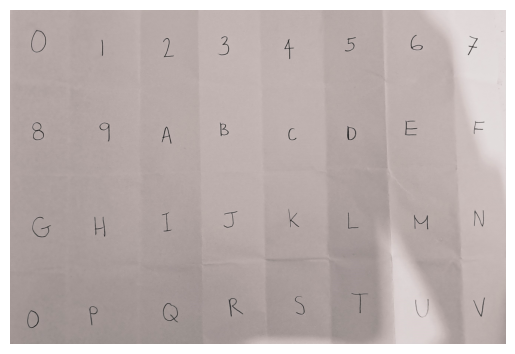

In [42]:
# my writing
image = cv2.imread('my_writing/set1.jpg')
image2 = cv2.imread('my_writing/set2.jpg')

print('image shape: ', image.shape)

plt.figure()
plt.axis("off")
plt.imshow(image);

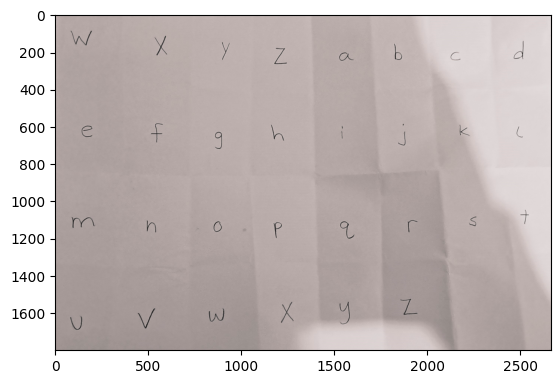

In [43]:
plt.imshow(image2)

In [44]:
blue, green, red = cv2.split(image) 
img_green = (np.dstack((green, green, green)))

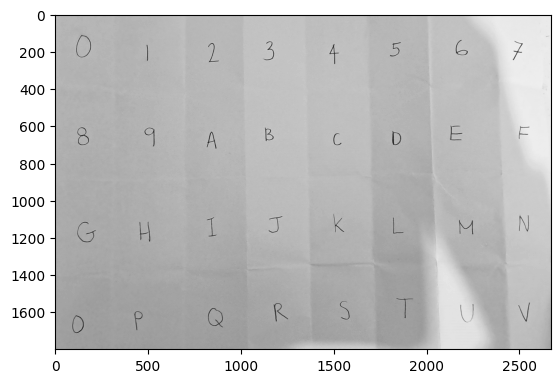

In [45]:
plt.gray()
plt.imshow(green)

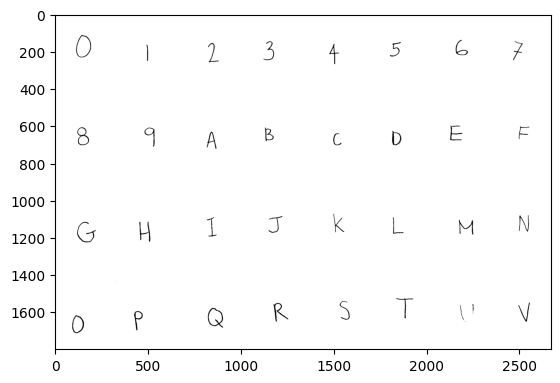

In [46]:
BW_image = []
for arr in green:
    new_arr = [0 if val < 130 else 255 for val in arr]
    BW_image.append(new_arr)
BW_image = np.array(BW_image)
plt.imshow(BW_image)

In [48]:
# It works! create a function to make black/white images

def convert_to_BW(image):
    blue, green, red = cv2.split(image) 
    img_green = (np.dstack((green, green, green)))
    BW_image = []
    for arr in green:
        new_arr = [0 if val < 130 else 255 for val in arr]
        BW_image.append(new_arr)
    BW_image = np.array(BW_image)
    return BW_image

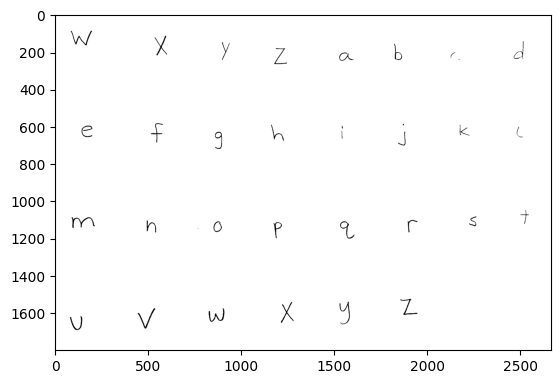

In [49]:
image2BW = convert_to_BW(image2)
plt.imshow(image2BW)